In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import cos, sin, pi

# Parameters for the toy control dataset
N_SAMPLES = 5000      # total points
K = 5                 # number of classes
DIM = 2               # 2-D so we can visualise
RADIUS = 4            # distance of each class centre from origin
SIGMA = 1.5           # Gaussian spread - drives overlap

rng = np.random.default_rng(42)

In [2]:
# Compute class means on the vertices of a regular K-gon
means = np.array([
    [RADIUS * cos(2 * pi * k / K), RADIUS * sin(2 * pi * k / K)]
    for k in range(K)
])

In [3]:
# Generate points: equal share per class
samples_per_class = N_SAMPLES // K
xs, ys = [], []
for k in range(K):
    cov = (SIGMA ** 2) * np.eye(DIM)
    xs.append(rng.multivariate_normal(means[k], cov, samples_per_class))
    ys.append(np.full(samples_per_class, k, dtype=int))

In [4]:
X = np.vstack(xs)
y = np.hstack(ys)

In [5]:
# Save to CSV: columns x1, x2, label
df = pd.DataFrame({
    "x1": X[:, 0],
    "x2": X[:, 1],
    "label": y
})
csv_path = "conftr_toy_dataset.csv"
df.to_csv(csv_path, index=False)

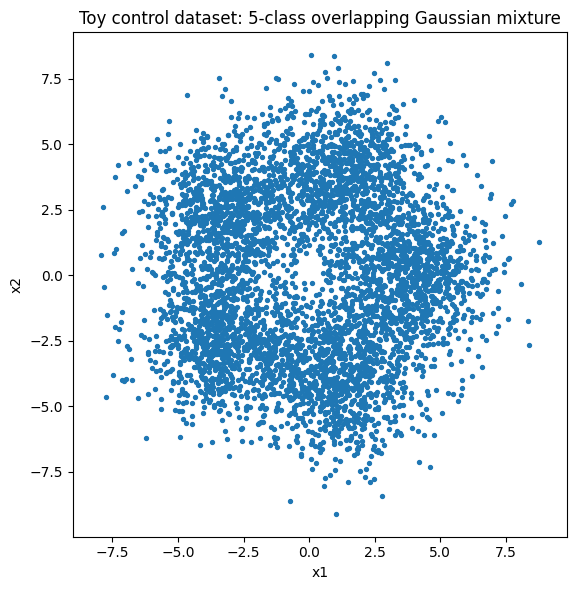

In [6]:
# Quick peek at the first few rows
preview = df.head()

# Simple scatter plot (no explicit colours specified)
plt.figure(figsize=(6, 6))
plt.scatter(df["x1"], df["x2"], s=8)  # default colour cycle
plt.title("Toy control dataset: 5-class overlapping Gaussian mixture")
plt.xlabel("x1")
plt.ylabel("x2")
plt.axis("equal")
plt.tight_layout()
plt.show()

In [ ]:
import ace_tools_open


ModuleNotFoundError: No module named 'ace_tools'